# Shahir Rahman

In [1]:
import os
import random
import numpy as np
import torch
import torchvision
from torchsummary import summary

from project_18408.datasets import *
from project_18408.training import *
from project_18408.evaluation import *
from project_18408.models.relu_toy_models import *

In [2]:
print("PyTorch Version:", torch.__version__)
print("Torchvision Version:", torchvision.__version__)
# Detect if we have a GPU available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print("Using the GPU!")
else:
    print("WARNING: Could not find GPU! Using CPU only")

PyTorch Version: 1.7.0
Torchvision Version: 0.8.1


C:\Users\Shahir\anaconda3\envs\py3-music\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [3]:
data_dir = "dataset/"
weights_dir = "weights/"
session_dir = "sessions/"

In [4]:
dataset_type = ImageDatasetType.MNIST

In [5]:
orig_datasets = get_img_dataset(data_dir, dataset_type)

Training


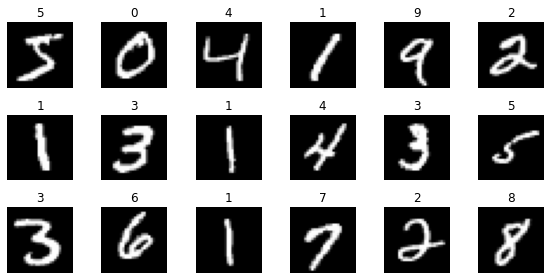

Testing


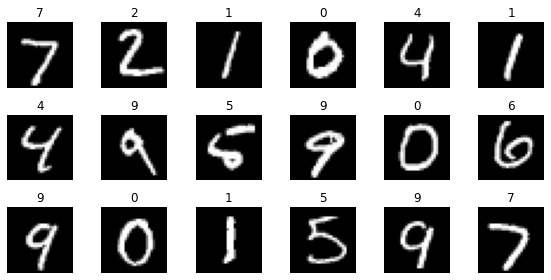

In [7]:
print("Training")
show_dataset_samples_img(orig_datasets['train'], cmap='gray')

print("Testing")
show_dataset_samples_img(orig_datasets['test'], cmap='gray')

In [8]:
datasets = apply_img_transforms(orig_datasets, dataset_type, flatten=True)

In [9]:
dataloaders = get_dataloaders(datasets, 64, 64)

In [10]:
input_dim = DATASET_TO_IMG_SIZE_FLAT[dataset_type]
num_classes = DATASET_TO_NUM_CLASSES[dataset_type]

model = ReLUToyModel(input_dim, num_classes, layer_dims=[100, 100, 100, 100, 100, 100, 100])
model = model.to(device)

In [11]:
summary(model, (input_dim,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 100]          78,400
              ReLU-2                  [-1, 100]               0
            Linear-3                  [-1, 100]          10,000
              ReLU-4                  [-1, 100]               0
            Linear-5                  [-1, 100]          10,000
              ReLU-6                  [-1, 100]               0
            Linear-7                  [-1, 100]          10,000
              ReLU-8                  [-1, 100]               0
            Linear-9                  [-1, 100]          10,000
             ReLU-10                  [-1, 100]               0
           Linear-11                  [-1, 100]          10,000
             ReLU-12                  [-1, 100]               0
           Linear-13                  [-1, 100]          10,000
             ReLU-14                  [

In [12]:
num_epochs = 10

criterion = get_loss()
criterion = criterion.to(device)

optimizer = make_optimizer(model, lr=0.01, verbose=False)

In [13]:
tracker = train_model(device=device,
                      model=model,
                      dataloaders=dataloaders,
                      criterion=criterion,
                      optimizer=optimizer,
                      lr_scheduler=None,
                      save_log=True,
                      save_model=True,
                      save_dir=weights_dir,
                      save_best=True,
                      save_all=True,
                      num_epochs=num_epochs)

  0%|                                                                                          | 0/938 [00:00<?, ?it/s]

Epoch 0/9
----------
Training


Avg. Loss: 2.3022, Total Loss: 2.2983, Loss Parts: [2.2983]: 100%|███████████████████| 938/938 [00:18<00:00, 51.25it/s]
  0%|                                                                                          | 0/157 [00:00<?, ?it/s]

Training Loss: 2.3022
Training Accuracy: 0.1095
Testing


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:05<00:00, 28.48it/s]

Testing loss 0.5781
Testing accuracy 0.1135


NameError: name 'get_timestamp' is not defined

In [ ]:
print(tracker.save_dir)

In [ ]:
%qtconsole

In [ ]:
save_training_session(model, optimizer, session_dir)